In [1]:
# Setup
import numpy as np
import math
import sklearn.tree
import pandas as pd
from sklearn.metrics import mean_squared_error

data = pd.read_csv("Carseats.csv")
data = data.to_numpy()
#np.random.shuffle(data)
data[data=="Yes"] = 1
data[data=="No"] = 0
data[data=="Good"] = 2
data[data=="Medium"] = 1
data[data=="Bad"] = 0

train, predict = np.vsplit(data, [300])
trainY, trainX = np.hsplit(train, [1])
trueY, predictX = np.hsplit(predict, [1])

MSE (Predict): 4.349155, MSE (Test): 3.069245 | Max Depth: 4, Least Node Size: 9
MSE (Predict): 3.561671, MSE (Test): 2.114074 | Max Depth: 7, Least Node Size: 8
MSE (Predict): 4.015773, MSE (Test): 1.218494 | Max Depth: 7, Least Node Size: 4
MSE (Predict): 3.982897, MSE (Test): 1.415047 | Max Depth: 6, Least Node Size: 3
MSE (Predict): 4.190268, MSE (Test): 0.273349 | Max Depth: 11, Least Node Size: 2
MSE (Predict): 3.663242, MSE (Test): 1.334348 | Max Depth: 18, Least Node Size: 5
MSE (Predict): 3.296797, MSE (Test): 1.872207 | Max Depth: 7, Least Node Size: 7
-------------------------------------------------------------------------------------
0.6211582898198733


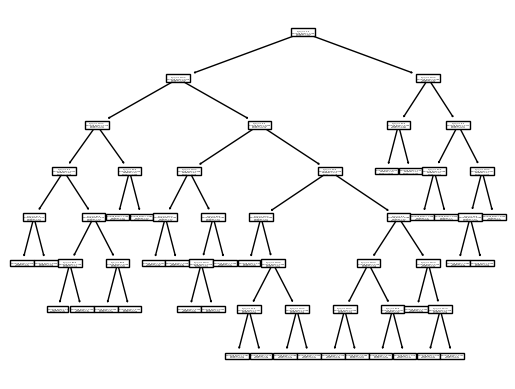

In [26]:
# Decision Tree
Acc = 0
MSE = 100
while MSE>3.3:
    Acc = 0
    np.random.shuffle(data)
    train, predict = np.vsplit(data, [300])
    trainY, trainX = np.hsplit(train, [1])
    trueY, predictX = np.hsplit(predict, [1])
    
    MSE = 100
    MSEValue = [0,0]
    for i in range(1, 30):
        for j in range(2, 30):
            clf = sklearn.tree.DecisionTreeRegressor(max_depth = i, min_samples_leaf = j)
            clf.fit(trainX, trainY)
            predictY = (clf.predict(predictX)).reshape(100,1)
            traintestY = (clf.predict(trainX)).reshape(300,1)

            if MSE > mean_squared_error(predictY, trueY):
                MSE = mean_squared_error(predictY, trueY)
                Acc2 = mean_squared_error(traintestY, trainY)
                MSEValue = [i ,j]
    print("MSE (Predict): %f, MSE (Test): %f | Max Depth: %d, Least Node Size: %d" %(MSE, Acc2, MSEValue[0], MSEValue[1]))

print("-------------------------------------------------------------------------------------")

clf = sklearn.tree.DecisionTreeRegressor(max_depth = MSEValue[0], min_samples_leaf = MSEValue[1])
clf = clf.fit(trainX, trainY)
sklearn.tree.plot_tree(clf)
print(clf.score(predictX, trueY))
#mean_squared_error(predictY, trueY)

In [6]:
# Bagging
from sklearn.ensemble import BaggingRegressor
trainY = trainY.reshape(300)
Acc = 0

for i in range(1, 10):
    for j in range(1, 11):
        clf = BaggingRegressor(base_estimator=sklearn.tree.DecisionTreeRegressor(), n_estimators=i*5, max_features=j,random_state = 0)
        clf.fit(trainX, trainY)
        predictY = clf.predict(predictX)
        if Acc < clf.score(predictX, trueY):
            Acc = clf.score(predictX, trueY)
            MSEValue = [i, j]
            print("Accuracy (Predict): %f, Accuracy (Train): %f | Number of Trees: %d, m: %d" %(clf.score(predictX, trueY), clf.score(trainX, trainY), MSEValue[0]*5, MSEValue[1]))
print("-------------------------------------------------------------------------------------")
#predictY = (clf.predict(predictX)).reshape(100, 1)

Accuracy (Predict): 0.128838, Accuracy (Train): 0.822276 | Number of Trees: 5, m: 3
Accuracy (Predict): 0.257862, Accuracy (Train): 0.826245 | Number of Trees: 5, m: 4
Accuracy (Predict): 0.271363, Accuracy (Train): 0.860279 | Number of Trees: 5, m: 5
Accuracy (Predict): 0.422986, Accuracy (Train): 0.859432 | Number of Trees: 5, m: 6
Accuracy (Predict): 0.494975, Accuracy (Train): 0.878517 | Number of Trees: 5, m: 8
Accuracy (Predict): 0.579267, Accuracy (Train): 0.914309 | Number of Trees: 5, m: 9
Accuracy (Predict): 0.591608, Accuracy (Train): 0.936910 | Number of Trees: 10, m: 10
Accuracy (Predict): 0.604858, Accuracy (Train): 0.940662 | Number of Trees: 15, m: 9
Accuracy (Predict): 0.617244, Accuracy (Train): 0.947326 | Number of Trees: 25, m: 9
Accuracy (Predict): 0.624593, Accuracy (Train): 0.951337 | Number of Trees: 25, m: 10
Accuracy (Predict): 0.629221, Accuracy (Train): 0.953501 | Number of Trees: 35, m: 9
Accuracy (Predict): 0.636910, Accuracy (Train): 0.955034 | Number of 

In [77]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
trainY = trainY.reshape(300)
Acc = 0

for i in range(2, 10):
    for j in range(1, 31):
        clf = RandomForestRegressor(n_estimators=j*10, min_samples_split=i, random_state = 0)
        clf.fit(trainX, trainY)
        predictY = clf.predict(predictX)
        if Acc < clf.score(predictX, trueY):
            Acc = clf.score(predictX, trueY)
            print("Accuracy (Predict): %f, Accuracy (Train): %f | Number of Trees: %d, m: %d" %(clf.score(predictX, trueY), clf.score(trainX, trainY), j*10, i))

print("-------------------------------------------------------------------------------------")
#predictY = (clf.predict(predictX)).reshape(100, 1)

Accuracy (Predict): 0.717061, Accuracy (Train): 0.929413 | Number of Trees: 10, m: 2
Accuracy (Predict): 0.732774, Accuracy (Train): 0.943103 | Number of Trees: 20, m: 2
Accuracy (Predict): 0.740606, Accuracy (Train): 0.947140 | Number of Trees: 30, m: 2
Accuracy (Predict): 0.744977, Accuracy (Train): 0.949786 | Number of Trees: 40, m: 2
Accuracy (Predict): 0.747659, Accuracy (Train): 0.952300 | Number of Trees: 50, m: 2
Accuracy (Predict): 0.748036, Accuracy (Train): 0.952779 | Number of Trees: 90, m: 2
Accuracy (Predict): 0.748135, Accuracy (Train): 0.941567 | Number of Trees: 50, m: 4
Accuracy (Predict): 0.748565, Accuracy (Train): 0.933800 | Number of Trees: 50, m: 5
-------------------------------------------------------------------------------------


0.03613800999999987
0.0038007225000000447
0.000662204444444469
0.0009394225000000005
0.021585486400000176
0.0076096544444444365
0.005580090000000088
0.0009447939062499597
7.5319753086411055e-06
0.00039800250000000397
0.0002648016528925894
0.0015490784027777822
0.0038659697633135963
0.00849030612244905
0.006478103511111098
0.004503248789062566
0.0033449212456746844
0.002994521604938254
0.003595580304709076
0.0016277190249999222
0.001697047641723378
0.0007472767768595282
0.0008115066918714478
0.001171065434027744
0.002567246223999895
0.0023373505917159646
0.001393777777777796
0.0020507959183672982
0.002909300404280585
0.003453521111111091
0.003888930530697107
0.00426123360351559
0.004685195078053291
0.0038170591349480838
0.0038192399999999313
0.003313601304012347
0.0024808476333088845
0.0021816274307479293
0.0019164189940827816
0.0024658673062499304
0.001985897923854779
0.002350864489795968
0.001995803677663612
0.0021312911621900613
0.0027220567111110876
0.0023776224007560787
0.002006277

<ErrorbarContainer object of 3 artists>

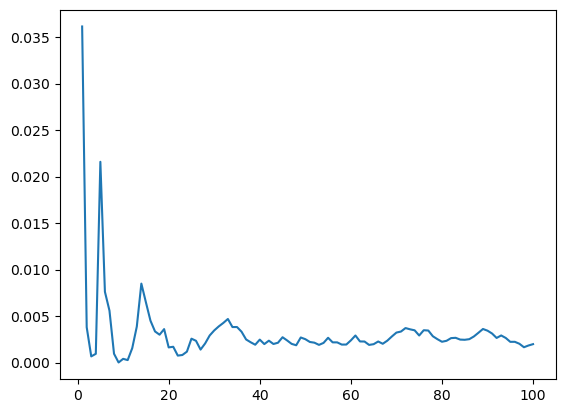

In [98]:
# Bias^2
import matplotlib.pyplot as plt
x=[]
y=[]

for i in range(1, 101):
    clf = RandomForestRegressor(n_estimators=i, random_state = 0)
    clf.fit(trainX, trainY)
    predictY = clf.predict(predictX)
    x.append(i)
    y.append(np.mean(predictY-trueY)**2)
    print((np.mean(predictY-trueY)**2))

plt.errorbar(x, y)

In [4]:
# Variance
x=[]
y=[]

for i in range(1, 101):
    clf = RandomForestRegressor(n_estimators=i, random_state = 0)
    clf.fit(trainX, trainY)
    predictY = clf.predict(predictX)
    x.append(i)
    y.append(np.mean((np.mean(predictY)-predictY)**2))
    print((np.mean((np.mean(predictY)-predictY)**2)))

plt.errorbar(x, y)

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# There is little correlation between bias^2 and the number of trees 
# Variance decreases as number of trees grows, but this stops after a certain threshhold